<a href="https://colab.research.google.com/github/Nayeong127/meotjin_yeongna/blob/main/220222_%EB%94%A5%EB%9F%AC%EB%8B%9DNLP%EC%9E%85%EB%AC%B8_CH3_ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **03. 언어 모델(Language Model)**

언어 모델(Languagel Model): 단어 시퀀스(문장)에 확률을 할당하는 모델
-> 이 문장 적절/ㄴ

## **1) 언어 모델(Language Model)이란?**

언어 모델을 만드는 방법
1. 통계를 이용한 방법
  - 실제 사용하는 자연어를 근사하기에는 많은 한계
2. 인공 신경망을 이용한 방법 
  - 더 좋은 성능
  - 자연어 처리의 기술인 GPT나 BERT 

### **1. 언어 모델(Language Model)**

언어 모델은 단어 시퀀스에 확률을 할당(assign) 하는 일을 하는 모델=가장 자연스러운 단어 시퀀스를 찾아내는 모델!!
- 보편적 방법: 이전 단어들이 주어졌을 때 다음 단어를 예측
- 주어진 양쪽의 단어들로부터 가운데 비어있는 단어를 예측하는 언어 모델 (BERT)

*언어 모델링(Language Modeling): 주어진 단어들로부터 아직 모르는 단어를 예측하는 작업.(이전 단어들로부터 다음 단어를 예측하는 일)*

### **2. 단어 시퀀스의 확률 할당**

자연어 처리에서 단어 시퀀스에 확률을 할당하는 일이 왜 필요할까요?

**a. 기계 번역(Machine Translation):**

P(나는 버스를 탔다) > P(나는 버스를 태운다)


**b. 오타 교정(Spell Correction)**

선생님이 교실로 부리나케
P(달려갔다) > P(잘려갔다)


**c. 음성 인식(Speech Recognition)**

P(나는 메롱을 먹는다) < P(나는 메론을 먹는다)

<font color=red>언어 모델은 확률을 통해 보다 적절한 문장을 판단~!!!

### **3. 주어진 이전 단어들로부터 다음 단어 예측하기**

확률 할당하기 위해 조건부 확률!
- 이전 단어를 보고 다음 단어 예측

**A. 단어 시퀀스의 확률**

하나의 단어를 w, 단어 시퀀스을 대문자 W라고 한다면, n개의 단어가 등장하는 단어 시퀀스 W의 확률

P(W)=P(w1,w2,w3,w4,w5,...,wn)

**B. 다음 단어 등장 확률**

n-1개의 단어가 나열된 상태에서 n번째 단어의 확률

P(wn|w1,...,wn−1)

예를 들어 다섯번째 단어의 확률은 아래와 같습니다.

P(w5|w1,w2,w3,w4)

전체 단어 시퀀스 W의 확률은 모든 단어가 예측되고 나서야 알 수 있으므로 단어 시퀀스의 확률은 다음과 같습니다.

P(W)=P(w1,w2,w3,w4,w5,...wn)



### **4. 언어 모델의 간단한 직관**

지각을 하는 바람에 비행기를 [?]라는 문장이 있습니다.사람은 쉽게 '놓쳤다'라고 예상할 수 있습니다. 우리 지식에 기반하여 나올 수 있는 여러 단어들을 후보에 놓고 놓쳤다는 단어가 나올 확률이 가장 높다고 판단하였기 때문입니다.

기계도 앞에 어떤 단어들이 나왔는지 고려하여 후보가 될 수 있는 여러 단어들에 대해서 등장 확률을 추정하고 가장 높은 확률을 가진 단어를 선택합니다.

### **5. 검색 엔진에서의 언어 모델의 예**

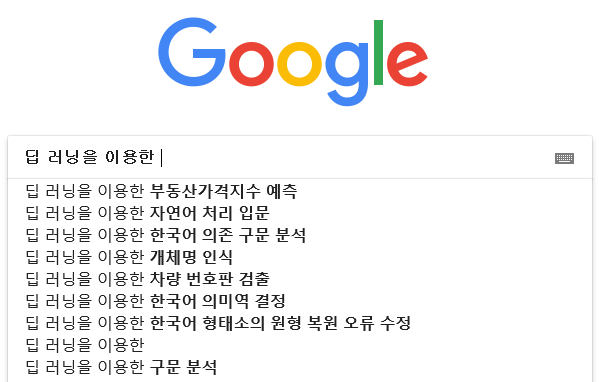

검색 엔진이 입력된 단어들의 나열에 대해서 다음 단어를 예측하는 언어 모델을 사용하고 있습니다.

## **2) 통계적 언어 모델(Statistical Language Model, SLM)**

통계적 언어 모델이 통계적인 접근 방법으로 어떻게 언어를 모델링 하는지




### **1. 조건부 확률**

조건부 확률은 두 확률 P(A),P(B)에 대해서 아래와 같은 관계를 갖습니다.
- p(B|A)=P(A,B)/P(A)
- P(A,B)=P(A)P(B|A)

4개의 확률이 조건부 확률

P(A,B,C,D)=P(A)P(B|A)P(C|A,B)P(D|A,B,C)


P(x1,x2,x3...xn)=P(x1)P(x2|x1)P(x3|x1,x2)...P(xn|x1...xn−1)

-> 조건부 확률의 연쇄 법칙(chain rule)

### **2. 문장에 대한 확률**
P(An adorable little boy is spreading smiles)

- 각 단어는 문맥이라는 관계로 인해 이전 단어의 영향을 받아 나온 단어-> 문장의 확률을 구하고자 조건부 확률을 사용

P(An adorable little boy is spreading smiles)=

P(An)×P(adorable|An)×P(little|An adorable)×P(boy|An adorable little)×P(is|An adorable little boy)×P(spreading|An adorable little boy is)×P(smiles|An adorable little boy is spreading)


문장의 확률을 구하기 위해서 각 단어에 대한 예측 확률들을 곱합니다.

### **3. 카운트 기반의 접근**

SLM은 이전 단어로부터 다음 단어에 대한 확률은 어떻게 구하냐면~ 카운트에 기반하여 확률을 계산!!!!!!!!

An adorable little boy가 나왔을 때, is가 나올 확률인 P(is|An adorable little boy)를 구해봅시다. 
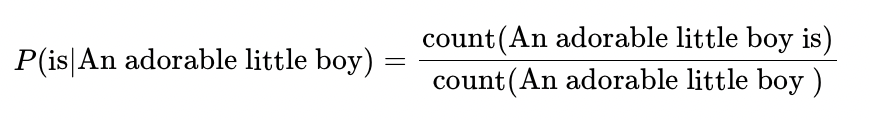


예를 들어 기계가 학습한 코퍼스 데이터에서 An adorable little boy가 100번 등장했는데 그 다음에 is가 등장한 경우는 30번이라고 합시다. 이 경우 P(is|An adorable little boy)는 30%입니다.

### **4. 카운트 기반 접근의 한계 - 희소 문제(Sparsity Problem)**


현실에서도 An adorable little boy가 나왔을 때 is가 나올 확률 존재.-> 실제 자연어의 확률 분포, 현실에서의 확률 분포라고 명칭 
- 기계에게 많은 코퍼스를 훈련시켜서 언어 모델을 통해 현실에서의 확률 분포를 근사하는 것이 언어 모델의 목표
  - 코퍼스(기계가 훈련하는 데이터)는 정말 방대한 양이 필요!!!!!!
  - P(is|An adorable little boy)를 구하는 경우에서 기계가 훈련한 코퍼스에 An adorable little boy is라는 단어 시퀀스가 없었다면 이 단어 시퀀스에 대한 확률은 0
  - 또는 An adorable little boy가 없으면 (분모 0되니까) 정의되지 못하는 확률이 됨!
-  코퍼스에 단어 시퀀스가 없다고 해서 이 확률을 0 또는 정의되지 않는 확률이라고 하는 것이 정확한 모델링이 아니지~ 현실에서 말 되니까


희소 문제(sparsity problem): 충분한 데이터를 관측하지 못하여 언어를 정확히 모델링하지 못하는 문제

-> 완화) n-gram 언어 모델, 스무딩이나 백오프와 같은 여러가지 일반화(generalization) 기법

하지만 희소 문제에 대한 근본적인 해결책은 되지 못하였습니다. 결국 이러한 한계로 인해 언어 모델의 트렌드는 통계적 언어 모델에서 인공 신경망 언어 모델로 넘어가게 됩니다.

## **3) N-gram 언어 모델(N-gram Language Model)**

n-gram 언어 모델은 여전히 카운트에 기반한 통계적 접근을 사용하고 있으므로 SLM의 일종입니다. 

BUTTT 이전에 등장한 모든 단어를 고려하는 것이 아니라 일부 단어(n개)만 고려하는 접근 방법을 사용!!!!!!!!

### **1. 코퍼스에서 카운트하지 못하는 경우의 감소.**

SLM의 한계
- 훈련 코퍼스에 확률을 계산하고 싶은 문장이나 단어가 없을 수 있다
- 확률을 계산하고 싶은 문장이 길어질수록 갖고있는 코퍼스에서 그 문장이 존재하지 않을 가능성이 높습니다. 

-> 카운트할 수 없을 가능성이 높습니다.

-> 참고하는 단어들을 줄이면 카운트를 할 수 있을 가능성이 높일 수 있습니다.

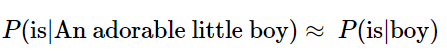

An adorable little boy가 나왔을 때 is가 나올 확률 ->  boy가 나왔을 때 is가 나올 확률로 생각해보는 건 어떨까요?!!!

갖고있는 코퍼스에 An adorable little boy is가 있을 가능성 보다는 boy is라는 더 짧은 단어 시퀀스가 존재할 가능성이 더 높습니다.

 little boy가 나왔을 때 is가 나올 확률로 생각하는 것도 오케이

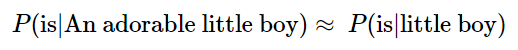

즉, 앞에서는 An adorable little boy가 나왔을 때 is가 나올 확률을 구하기 위해서는 An adorable little boy가 나온 횟수와 An adorable little boy is가 나온 횟수를 카운트해야만 했지만, 이제는 단어의 확률을 구하고자 기준 단어의 앞 단어를 전부 포함해서 카운트하는 것이 아니라, **앞 단어 중 임의의 개수만 포함해서 카운트하여 근사**하자는 것입니다. 이렇게 하면 갖고 있는 코퍼스에서 해당 단어의 시퀀스를 카운트할 확률이 높아집니다.

### **2. N-gram**


 갖고 있는 코퍼스에서 n개의 단어 뭉치 단위로 끊어서 이를 하나의 토큰으로 간주합니다. 
 
 An adorable little boy is spreading smiles이 있을 때, 각 n에 대해서 n-gram

- unigrams : an, adorable, little, boy, is, spreading, smiles
- bigrams : an adorable, adorable little, little boy, boy is, is spreading, spreading smiles
- trigrams : an adorable little, adorable little boy, little boy is, boy is spreading, is spreading smiles
- 4-grams : an adorable little boy, adorable little boy is, little boy is spreading, boy is spreading smiles

n-gram을 통한 언어 모델에서는 다음에 나올 단어의 예측은 오직 n-1개의 단어에만 의존합니다. n=4라고 한 4-gram을 이용한 언어 모델은 n-1에 해당되는 앞의 3개의 단어만을 고려

🎃그니까 4은 그 청크고 3개를 보고 뒤에 4번째 예측한다고

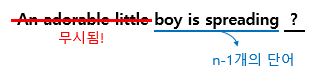

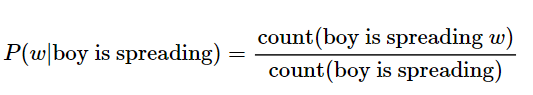

만약 갖고있는 코퍼스에서 boy is spreading가 1,000번 등장했다고 합시다. 그리고 boy is spreading insults가 500번 등장했으며, boy is spreading smiles가 200번 등장했다고 합시다. 그렇게 되면 boy is spreading 다음에 insults가 등장할 확률은 50%이며, smiles가 등장할 확률은 20%입니다. 확률적 선택에 따라 우리는 insults가 더 맞다고 판단하게 됩니다.

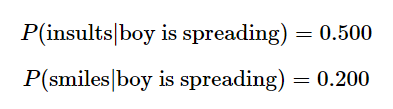

**3. N-gram Language Model의 한계**

4-gram 언어 모델은 주어진 문장에서 앞에 있던 단어인 '작고 사랑스러운(an adorable little)'이라는 수식어를 제거하고, 반영하지 않았습니다. 그런데 '작고 사랑스러운' 수식어까지 모두 고려하여 작고 사랑하는 소년이 하는 행동에 대해 다음 단어를 예측하는 언어 모델이었다면 과연 '작고 사랑스러운 소년이' '모욕을 퍼트렸다'라는 부정적인 내용이 '웃음 지었다'라는 긍정적인 내용 대신 선택되었을까요?

 n-gram은 뒤의 단어 몇 개만 보다 보니 **의도하고 싶은 대로 문장을 끝맺음하지 못하는 경우가 생긴다는 점입니다**. 문장을 읽다 보면 앞 부분과 뒷부분의 문맥이 전혀 연결 안 되는 경우도 생길 수 있습니다. 
 
 -> 전체 문장을 고려한 언어 모델보다는 정확도가 떨어질 수밖에 없습니다. 
 
 
 
  **n-gram 모델에 대한 한계점**

1. 희소 문제(Sparsity Problem)
- n-gram 언어 모델도 여전히 희소 문제가 존재합니다.

2. n을 선택하는 것은 진퇴유곡
- n을 1보다는 2로 선택하는 것은 거의 대부분의 경우에서 언어 모델의 성능을 높일 수 있습니다. 가령, spreading만 보는 것보다는 is spreading을 보고 다음 단어를 예측하는 것이 더 정확하기 때문입니다. 이 경우 훈련 데이터가 적절한 데이터였다면 언어 모델이 적어도 spreading 다음에 동사를 고르지 않을 것입니다.
🎃spreading is..

- n을 **크게** 선택하면 
  - 실제 훈련 코퍼스에서 해당 n-gram을 카운트할 수 있는 확률은 적어지므로 희소 문제는 점점 심각해집니다.
  - 모델 사이즈가 커진다는 문제점도 있습니다. 기본적으로 코퍼스의 모든 n-gram에 대해서 카운트를 해야 하기 때문입니다.
  🎃아까 나열한 유니/바이/..그램들에 대해 다 해야 하니까!

- n을 **작게** 선택하면 
 - 훈련 코퍼스에서 카운트는 잘 되겠지만 근사의 정확도는 현실의 확률분포와 멀어집니다. 
 
-> 그렇기 때문에 적절한 n을 선택해야 합니다. 정확도를 높이려면 n은 최대 5를 넘게 잡아서는 안 된다고 권장되고 있습니다.

- n이 성능에 영향을 주는 것을 확인할 수 있는 유명한 예제 
 - 3,800만 개의 단어 토큰에 대하여 n-gram 언어 모델을 학습하고, 1,500만 개의 테스트 데이터에 대해서 테스트를 했을 때 다음과 같은 성능이 나왔다고 합니다. *펄플렉서티(perplexity)는 수치가 낮을수록 더 좋은 성능을 나타냅니다.* 
위의 결과는 n을 1에서 2, 2에서 3으로 올릴 때마다 성능이 올라가는 것을 보여줍니다.

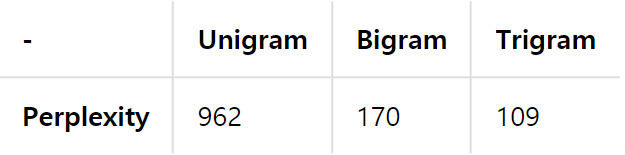


### **4. 적용 분야(Domain)에 맞는 코퍼스의 수집**

어떤 분야인지, 어떤 어플리케이션인지에 따라서 특정 단어들의 확률 분포는 당연히 다릅니다. 가령, 마케팅 분야에서는 마케팅 단어가 빈번하게 등장할 것이고, 의료 분야에서는 의료 관련 단어가 당연히 빈번하게 등장합니다. 이 경우 **언어 모델에 사용하는 코퍼스를 해당 도메인의 코퍼스를 사용한다면 당연히 언어 모델이 제대로 된 언어 생성을 할 가능성이 높아집니다**.

### **5. 인공 신경망을 이용한 언어 모델(Neural Network Based Language Model)**

N-gram Language Model의 한계점을 극복하기 위해 분모, 분자에 숫자를 더해서 카운트했을 때 0이 되는 것을 방지하는 등의 여러 일반화(generalization) 방법들이 존재합니다. 

그럼에도 본질적으로 n-gram 언어 모델에 대한 취약점을 완전히 해결하지는 못하였고, 이를 위한 대안으로 성능이 우수한 인공 신경망을 이용한 언어 모델이 많이 사용되고 있습니다. 



## **4)한국어에서의 언어 모델(Language Model for Korean Sentences)**
영어나 기타 언어에 비해서 한국어는 언어 모델로 다음 단어를 예측하기가 훨씬 까다롭습니다.  한국어 자연어 처리는 그만큼 영어보다 훨씬 어렵습니다.

### **1. 한국어는 어순이 중요하지 않다.**

한국어에서는 어순이 중요하지 않습니다. 그래서 이전 단어가 주어졌을때, 다음 단어가 나타날 확률을 구해야하는데 어순이 중요하지 않다는 것은 어떤 단어든 나타나도 된다는 의미입니다.

Ex)
1. 나는 운동을 합니다 체육관에서.
2. 나는 체육관에서 운동을 합니다.
3. 체육관에서 운동을 합니다.
4. 나는 운동을 체육관에서 합니다.

4개의 문장은 전부 의미가 통하는 것을 볼 수 있습니다. 심지어 '나는' 이라는 주어를 생략해도 말이 되버립니다. 이렇게 단어 순서를 뒤죽박죽으로 바꾸어놔도 한국어는 의미가 전달 되기 때문에 **확률에 기반한 언어 모델이 제대로 다음 단어를 예측하기가 어렵습니다.**

🎃 나는 운동을 합니다.. 
 - 체육관에서/매일/친구와/열심히 등...~

### **2. 한국어는 교착어이다.**

 띄어쓰기 단위인 어절 단위로 토큰화를 할 경우에는 문장에서 발생가능한 단어의 수가 굉장히 늘어납.
🎃내가.. (철수/영희/보라)(와/를/에게/한테/...)

-> 한국어에서는 토큰화를 통해 접사나 조사 등을 분리하는 것은 중요한 작업이 되기도 합니다. 같은 단어임에도 서로 다른 조사가 붙어서 다른 단어로 인식이 되면 자연어 처리가 힘들고 번거로워지는 경우가 많거든


### **3. 한국어는 띄어쓰기가 제대로 지켜지지 않는다.**

한국어는 띄어쓰기를 제대로 하지 않아도 의미가 전달되며, 띄어쓰기 규칙 또한 상대적으로 까다로운 언어이기 때문에 자연어 처리를 하는 것에 있어서 한국어 코퍼스는 띄어쓰기가 제대로 지켜지지 않는 경우가 많습니다.**토큰이 제대로 분리 되지 않은 채 훈련 데이터로 사용된다면 언어 모델은 제대로 동작하지 않습니다.**
🎃뭉텅이로 작성한 텍스트를 컴퓨터가 정확하게 인식하는 것이 어렵다는 점입니다. 예측에서의 어려움이 아니라~ 훈련에서!!

## **5)펄플렉서티(Perplexity)**
두 개의 모델 A, B가 있을 때 이 모델의 성능은 어떻게 비교할 수 있을까요? 
- 오타 교정, 기계 번역 등의 평가,해당 업무의 성능을 누가 더 잘했는지를 비교 

그런데 두 모델의 성능을 비교하고자, 일일이 모델들에 대해서 실제 작업을 시켜보고 정확도를 비교하는 작업은 공수가 너무 많이 드는 작업입니다. - 외부 평가(extrinsic evaluation)

-> 조금은 부정확할 수는 있어도 테스트 데이터에 대해서 빠르게 식으로 계산되는 더 간단한 평가 방법!! **모델 내에서 자신의 성능을 수치화하여 결과를 내놓는 내부 평가(Intrinsic evaluation)에 해당되는 펄플렉서티(perplexity)**

## **1. 언어 모델의 평가 방법(Evaluation metric) : PPL.**

펄플렉서티: 언어 모델을 평가하기 위한 내부 평가 지표- PPL

 PPL은 '헷갈리는 정도'로 이해합시다.  '낮을수록' 언어 모델의 성능이 좋다는 것

🌹🌹
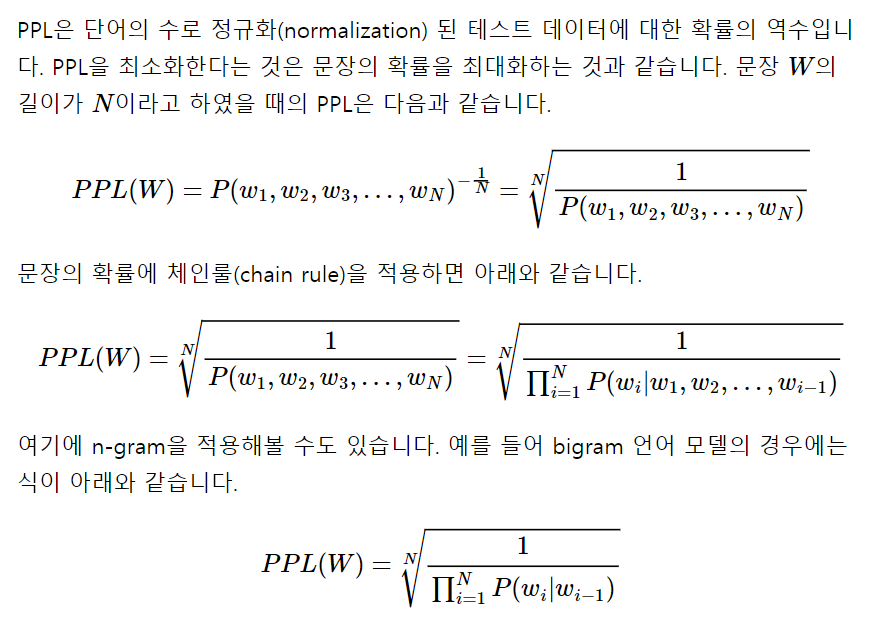

## **2. 분기 계수(Branching factor)**

**PPL은 이 언어 모델이 특정 시점에서 평균적으로 몇 개의 선택지를 가지고 고민하고 있는지**
 - 가령, 언어 모델에 어떤 테스트 데이터을 주고 측정했더니 PPL이 10이 나왔다고 해봅시다. 그렇다면 해당 언어 모델은 테스트 데이터에 대해서 다음 단어를 예측하는 모든 시점(time-step)마다 평균적으로 10개의 단어를 가지고 어떤 것이 정답인지 고민하고 있다고 볼 수 있습니다. 

- 같은 테스트 데이터에 대해서 두 언어 모델의 PPL을 각각 계산 후에 PPL의 값을 비교하면, 두 언어 모델 중 어떤 것이 성능이 좋은지도 판단이 가능합니다. 

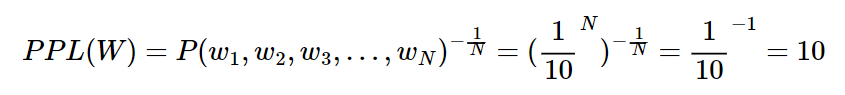 


- PPL의 값이 낮다는 것은 테스트 데이터 상에서 높은 정확도를 보인다는 것이지, **사람이 직접 느끼기에 좋은 언어 모델이라는 것을 반드시 의미하진 않는다는 점입니다.** 
🎃1이 나와서 한 개씩만 고민한다 해도 코퍼스가 작어서 그런 걸수도 있고~
- 언어 모델의 PPL은 테스트 데이터에 의존하므로 두 개 이상의 언어 모델을 비교할 때는 정량적으로 양이 많고, 🏓새로운 작은 데이터로 하는 게 아니라 큰 데이터로 해야 해서!?!?!?!? 
- 도메인에 알맞은 동일한 테스트 데이터를 사용해야 신뢰도가 높다는 것입니다.

### **3. 기존 언어 모델 Vs. 인공 신경망을 이용한 언어 모델.**

PPL의 실제 사용 사례

페이스북 AI 연구팀은 우리가 앞서 배운 n-gram 언어 모델과 이후 배우게 될 딥 러닝을 이용한 언어 모델에 대해서 PPL로 성능 테스트를 한 표를 공개한 바 있습니다.

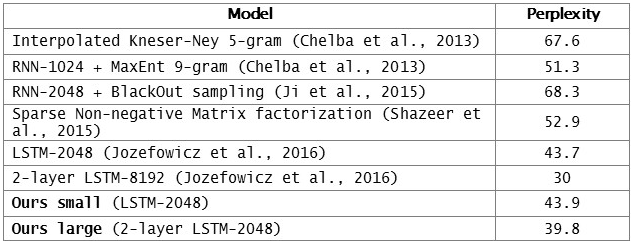

링크 : https://research.fb.com/building-an-efficient-neural-language-model-over-a-billion-words/

- n-gram- PPL이 67.6으로 측정되었습니다. 5-gram 앞에 Interpolated Kneser-Ney라는 이름이 붙었는데 이 책에서는 별도 설명을 생략하겠다고 했던 일반화(generalization) 방법이 사용된 모델입니다.
- 그 아래의 모델들은 인공 신경망을 이용한 언어 모델들로 대부분 n-gram을 이용한 언어 모델보다 더 좋은 성능 평가를 받았음을 확인할 수 있습니다.



## **6)조건부 확률(Conditional Probability)**

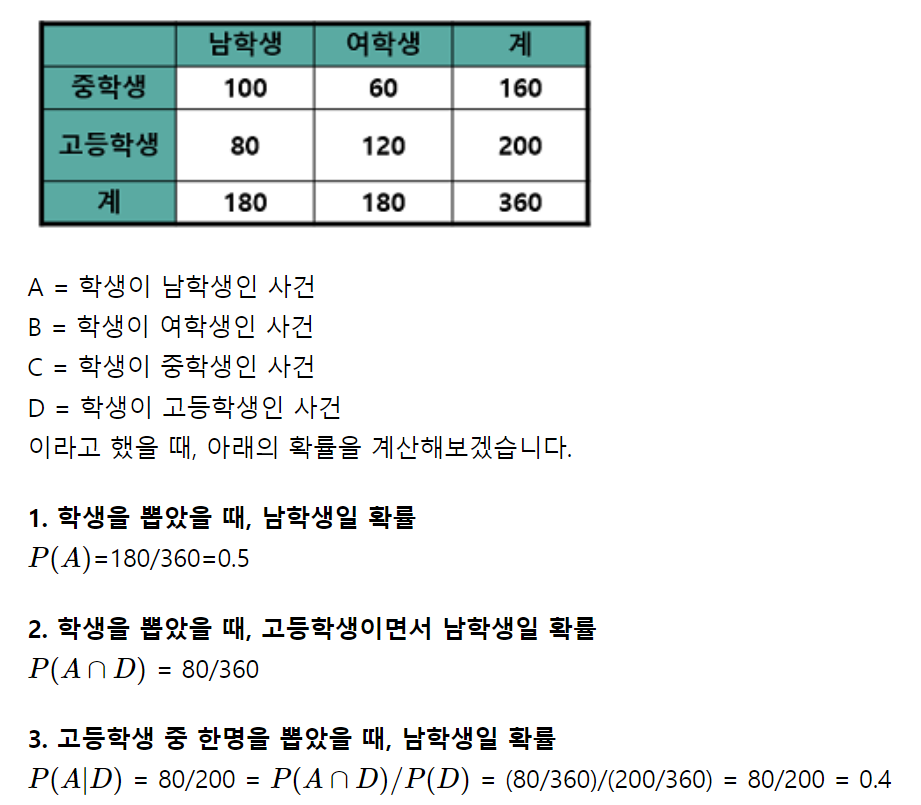